In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\varun\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\varun\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\varun\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\varun\anaconda3\Lib\site-packages\setuptools\_v

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.1.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.3.0
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrit

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
!pip install tensorflow-datasets

In [5]:
# Bring in tensorflow datasets for fashion mnist
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

In [6]:
# Use tensorflow datasets api to bring in the data source
ds = tfds.load('fashion_mnist', split='train')


In [7]:
ds.as_numpy_iterator().next()['label']

2

# Viz Data and Build Dataset

In [8]:
# Do some data transformation
import numpy as np


In [9]:
# setup connection aka iteratior
dataiterator = ds.as_numpy_iterator()

In [46]:
# Getting data out of the pipeline
dataiterator.next()['image']


array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  1],
        [  1],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  2],
        [  1],
        [  1],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 69],
        [146],
        [ 56],
        [  4],
        [ 14],
        [ 10],
        [ 59],
        [149],
        [ 70],
        [  0],
        [  0],
        [  0],
        [  0],
        [  2],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  1],
        [  0],
        [  0],
        [ 83],
        [202],
        [229],
      

In [47]:
ax[0]

<Axes: >

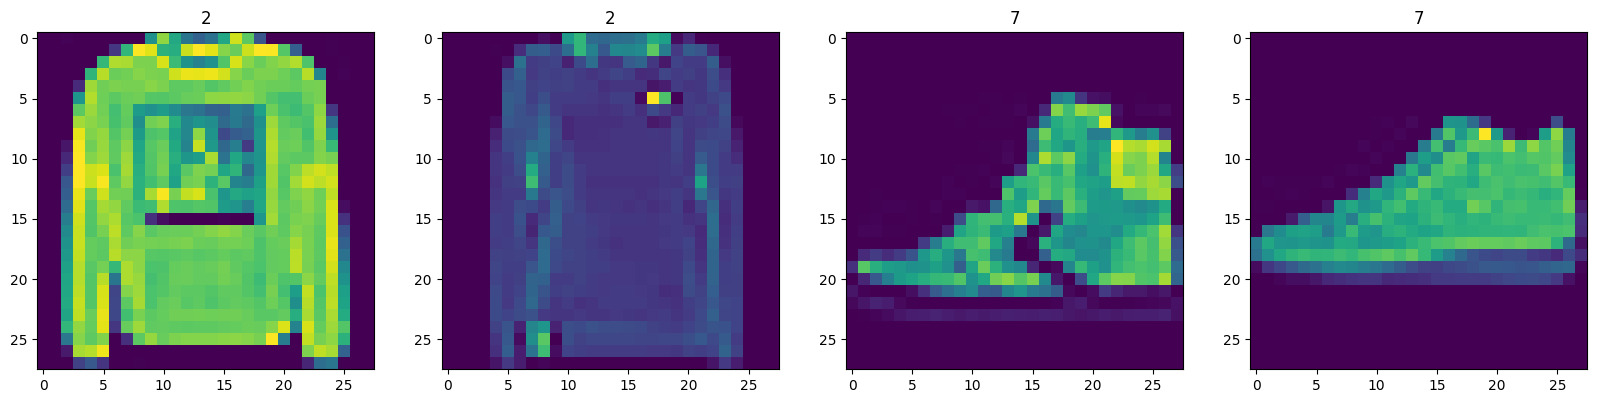

In [99]:
# setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Looop four times and get images
for idx in range(4):
    
    # Grab an imagemand label
    sample = dataiterator.next()
    # plot the image using a specific subplot
    ax[idx].imshow(np.squeeze(sample['image']))
    # Appending the image label as the plot title
    ax[idx].title.set_text(sample['label'])

In [49]:
# Scale and return images only
def scale_images(data):
    image = data['image']
    return image / 255

In [50]:
# Reload the dataset
ds = tfds.load('fashion_mnist', split='train')
# Running the dataset through the scale_images preprocessing step
ds = ds.map(scale_images)
# Cache the dataset for that batch
ds = ds.cache()
# shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 image per sample
ds = ds.batch(128)
# Reduces the likelihood of battlenecking
ds = ds.prefetch(64)

In [51]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

# Build Newral Network

import Modelling Components

In [52]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D


In [53]:
def build_generator():
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling blaock 1
    model.add(UpSampling2D())
    model.add(Conv2D(128, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling blaock 2
    model.add(UpSampling2D())
    model.add(Conv2D(1, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    #Convolutional block 1
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(128, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv Layer to get to one channel
    model.add(Conv2D(1, 4,padding='same', activation='sigmoid'))
    return model

In [54]:
generator = build_generator()

In [55]:
generator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 1)      │         3,201 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,488,514 (5.68 MB)

 Trainable params: 1,488,514 (5.68 MB)

 Non-trainable params: 0 (0.00 B)

In [209]:
img = generator.predict(np.random.randn(4,128,1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [210]:
img.shape

(4, 28, 28, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


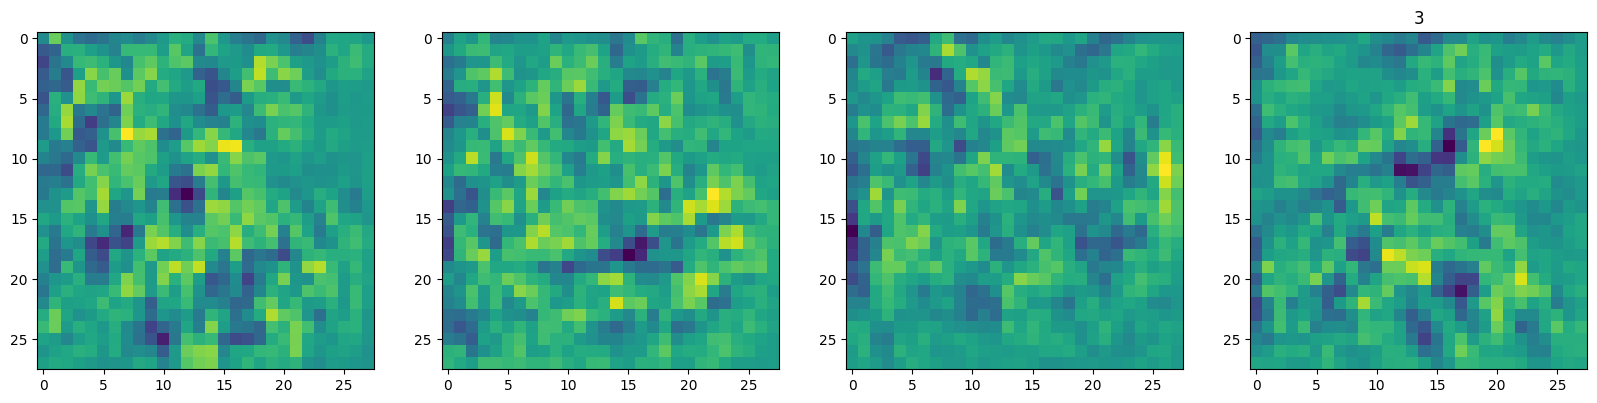

In [197]:
# Generate new fashion
img = generator.predict(np.random.randn(4,128,1))
# setup the subplot formatting
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images
for idx, img in enumerate(img):
    # PLot the image using a specific subplot
    ax[idx].imshow(np.squeeze(img))
# Appending the image Label as the plot title
ax[idx].title.set_text(idx)

# Build Discriminator

In [198]:
import numpy as np
import matplotlib.pyplot as plt



In [199]:
def build_discriminator():
    model = Sequential()
    
    # First Conv Bock
    model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    # second conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third conv Block
    model.add(Conv2D(124, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourt Conv BLock
    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

In [200]:
img.shape

(28, 28, 1)

In [201]:
discriminator = build_discriminator()

In [202]:
discriminator.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_46 (LeakyReLU)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_47 (LeakyReLU)      │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 16, 16, 124)    │       198,524 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_48 (LeakyReLU)      │ (None, 16, 16, 124)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 16, 16, 124)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 12, 12, 256)    │       793,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_49 (LeakyReLU)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,081,341 (4.12 MB)

 Trainable params: 1,081,341 (4.12 MB)

 Non-trainable params: 0 (0.00 B)

In [203]:
print(type(img))
print(img)


<class 'numpy.ndarray'>
[[[0.49808168]
  [0.49829203]
  [0.4985637 ]
  [0.49939817]
  [0.49960837]
  [0.49962693]
  [0.49969682]
  [0.49973345]
  [0.49986327]
  [0.50049657]
  [0.49962902]
  [0.49934047]
  [0.49898815]
  [0.49931675]
  [0.4979038 ]
  [0.49844474]
  [0.49944916]
  [0.49948102]
  [0.50033015]
  [0.49975774]
  [0.49992058]
  [0.49913347]
  [0.49943355]
  [0.50013137]
  [0.49949807]
  [0.49922815]
  [0.49967092]
  [0.50008136]]

 [[0.4977762 ]
  [0.49960154]
  [0.49967676]
  [0.50171316]
  [0.5004086 ]
  [0.5007609 ]
  [0.5003736 ]
  [0.5005597 ]
  [0.50011355]
  [0.49982378]
  [0.4992392 ]
  [0.49827456]
  [0.4979406 ]
  [0.49856   ]
  [0.49930203]
  [0.50036824]
  [0.5015085 ]
  [0.50201154]
  [0.5007332 ]
  [0.5011258 ]
  [0.5002934 ]
  [0.50014603]
  [0.5001067 ]
  [0.50035965]
  [0.5006521 ]
  [0.49996927]
  [0.5005526 ]
  [0.5001776 ]]

 [[0.49810296]
  [0.49922717]
  [0.5001719 ]
  [0.5013497 ]
  [0.5007993 ]
  [0.5009067 ]
  [0.50078607]
  [0.50034505]
  [0.5000549

In [204]:
img = img[0]

In [211]:
img.shape

(4, 28, 28, 1)

In [212]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


array([[0.48786044],
       [0.48788157],
       [0.48788333],
       [0.48788288]], dtype=float32)

# Construct Training Loop

# Setup Losses and optimizers

In [213]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both
from tensorflow.keras.losses import BinaryCrossentropy

In [214]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

Building Subclassed Model

In [243]:
# import the base model class to subclass our training step
from tensorflow.keras.models import Model

In [292]:
tf.concat([tf.zeros_like(tf.random.normal((6, 128,))), tf.ones_like(tf.random.normal((6,128)))], axis=0)

<tf.Tensor: shape=(12, 128), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)>

In [417]:
import tensorflow as tf
from tensorflow.keras import Model

class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to the base class
        super().__init__(*args, **kwargs)
        
        # Create attributes for generator and discriminator
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with the base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the real images from the batch
        real_images = batch
        fake_images = self.generator(tf.random.normal((real_images.shape[0], 128)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fake images
            y_realfake = tf.concat([tf.ones_like(yhat_real), tf.zeros_like(yhat_fake)], axis=0)

            # Add noise to the labels
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate discriminator loss
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
        
        # Apply backpropagation to the discriminator
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate new images
            gen_images = self.generator(tf.random.normal((128,128,1), training=True))

            # Predict labels for generated images
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate generator loss
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)
        
        # Apply backpropagation to the generator
        g_grad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}


In [410]:
# Create instance of subclassed model
fashgan = FashionGAN(generator, discriminator)

In [411]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

Build callback

In [412]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [413]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim
        
        def on_epoch_end(self, epoch, logs=None):
            random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
            generated_images = self.model.generator(random_latent_vectors)
            generated_images *= 255
            generated_images.numpy()
            for i in range(self.num_img):
                img = array_to_img(generated_images[i])
                img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

Train

In [414]:
ds.as_numpy_iterator()

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000019E3C632B50>)

In [422]:
def train_step(self, batch):
    # Get the real images from the batch
    real_images = batch
    batch_size = real_images.shape[0]  # Get batch size directly

    # Generate noise for the generator
    noise = tf.random.normal([batch_size, 128])  # Noise shape based on batch_size

    # Create fake images using the generator
    fake_images = self.generator(noise, training=False)

    # Train the discriminator
    with tf.GradientTape() as d_tape:
        real_output = self.discriminator(real_images, training=True)
        fake_output = self.discriminator(fake_images, training=True)
        d_loss = self.d_loss_fn(real_output, fake_output)
    
    # Calculate and apply gradients for the discriminator
    grads = d_tape.gradient(d_loss, self.discriminator.trainable_variables)
    self.d_optimizer.apply_gradients(zip(grads, self.discriminator.trainable_variables))

    # Train the generator
    with tf.GradientTape() as g_tape:
        fake_output = self.discriminator(fake_images, training=False)
        g_loss = self.g_loss_fn(fake_output)
    
    # Calculate and apply gradients for the generator
    grads = g_tape.gradient(g_loss, self.generator.trainable_variables)
    self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

    return d_loss, g_loss


# Test out the Generator

Generate images

In [426]:
import os
print(os.path.abspath(os.path.join('archive', 'generatormodel.h5')))


C:\Users\varun\archive\generatormodel.h5


In [428]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


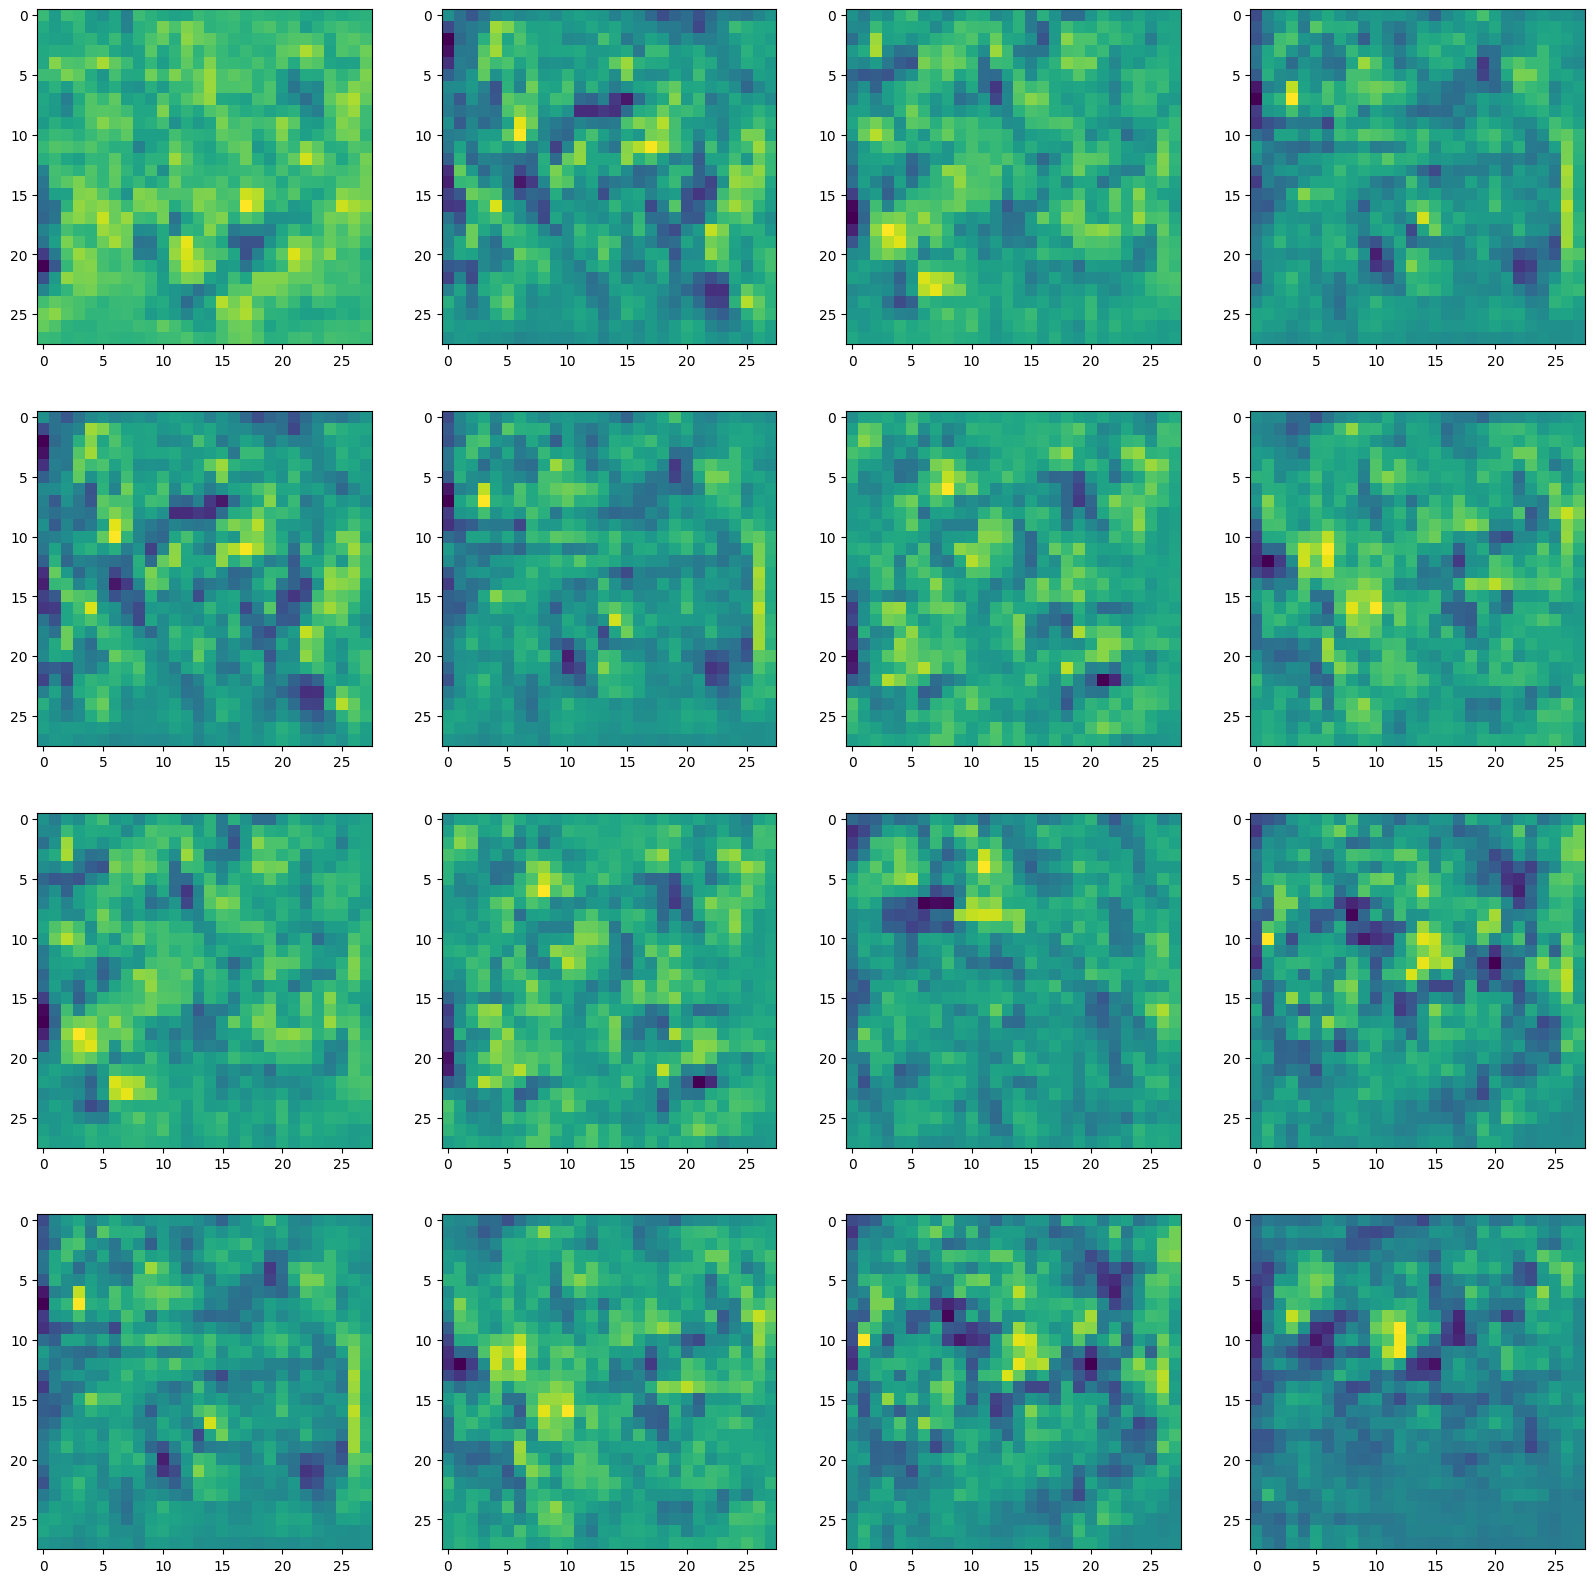

In [429]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(20,20))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(imgs[(r+1)*(c+1)-1])

Save the Model


In [432]:
generator.save('generator.keras')  # Recommended Keras format